In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results_df = pd.read_pickle('outputData.pkl')
results_df

,Episode,Reward,Algorithm,Seed
0,1,-98.205759,PPO,Seed 42
1,2,-155.179057,PPO,Seed 42
2,3,-159.992604,PPO,Seed 42
3,4,-294.496111,PPO,Seed 42
4,5,-132.383985,PPO,Seed 42
...,...,...,...,...
82833,7953,262.782875,TRPO,Seed 999
82834,7954,273.426197,TRPO,Seed 999
82835,7955,255.871210,TRPO,Seed 999
82836,7956,66.007734,TRPO,Seed 999


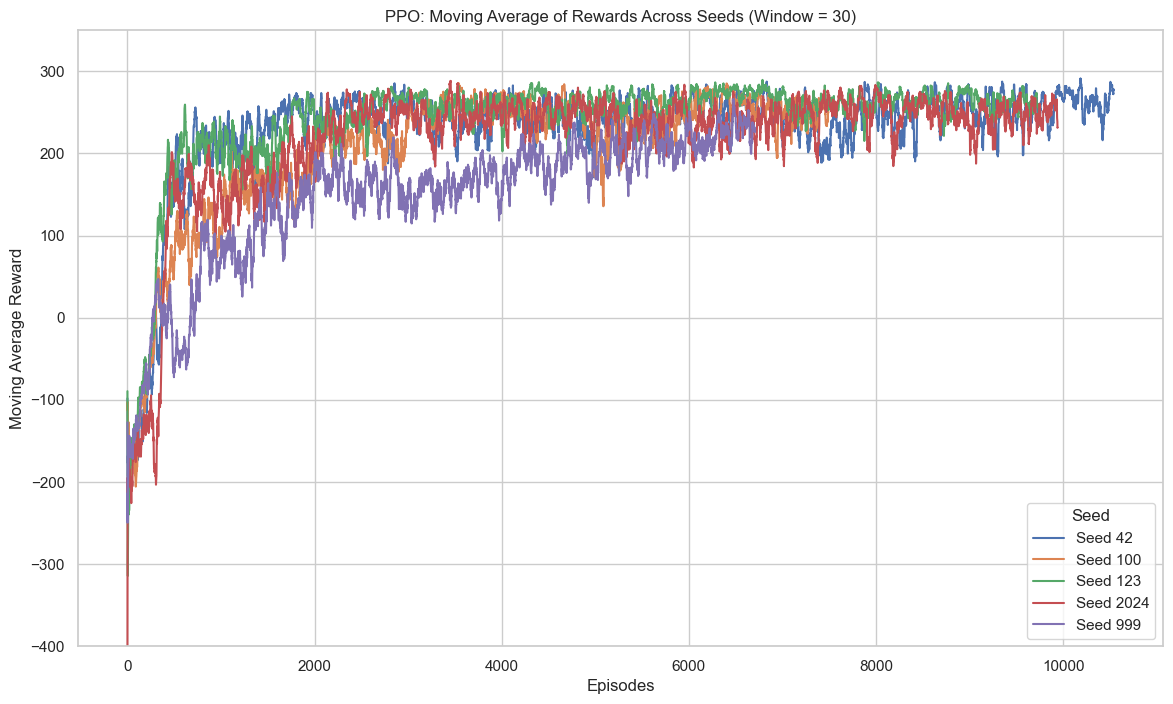

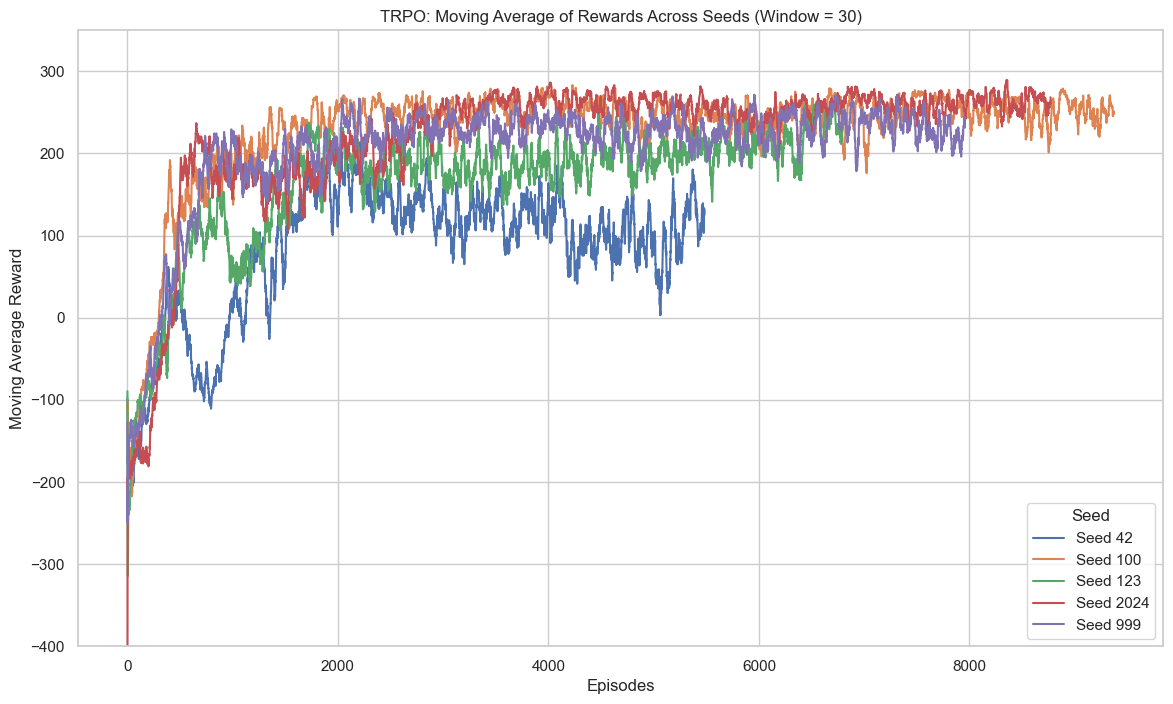

In [3]:


def compute_moving_average(data, window_size=100):
    data = data.copy()
    data["Moving_Avg"] = (
        data.groupby(["Algorithm", "Seed"])["Reward"]
        .transform(lambda x: x.rolling(window_size, min_periods=1).mean())
    )
    return data

def plot_moving_average_across_seeds(data, window_size=100):
    sns.set(style="whitegrid")
    algorithms = data["Algorithm"].unique()

    for algorithm in algorithms:
        plt.figure(figsize=(14, 8))
        sns.lineplot(
            data=data[data["Algorithm"] == algorithm],
            x="Episode",
            y="Moving_Avg",
            hue="Seed",
            estimator=None  # Plot raw moving averages for each seed
        )
        plt.title(f"{algorithm}: Moving Average of Rewards Across Seeds (Window = {window_size})")
        plt.xlabel("Episodes")
        plt.ylabel("Moving Average Reward")
        plt.ylim(-400, 350)  # Fix y-axis range
        plt.legend(title="Seed")
        plt.grid(True)
        plt.show()

# Configuration
window_size = 30  # Moving average window size

# Compute moving averages
results_with_moving_avg = compute_moving_average(results_df, window_size)

# Plot moving averages with fixed y-axis
plot_moving_average_across_seeds(results_with_moving_avg, window_size)


In [ ]:
# results

In [5]:
results_df.columns

Index(['Episode', 'Reward', 'Algorithm', 'Seed'], dtype='object')

In [6]:
filtered_df = results_df[(results_df['Episode'] >= 0) & (results_df['Episode'] <= 2000)]
filtered_df

,Episode,Reward,Algorithm,Seed
0,1,-98.205759,PPO,Seed 42
1,2,-155.179057,PPO,Seed 42
2,3,-159.992604,PPO,Seed 42
3,4,-294.496111,PPO,Seed 42
4,5,-132.383985,PPO,Seed 42
...,...,...,...,...
76876,1996,-4.847532,TRPO,Seed 999
76877,1997,288.145368,TRPO,Seed 999
76878,1998,126.523732,TRPO,Seed 999
76879,1999,269.048633,TRPO,Seed 999


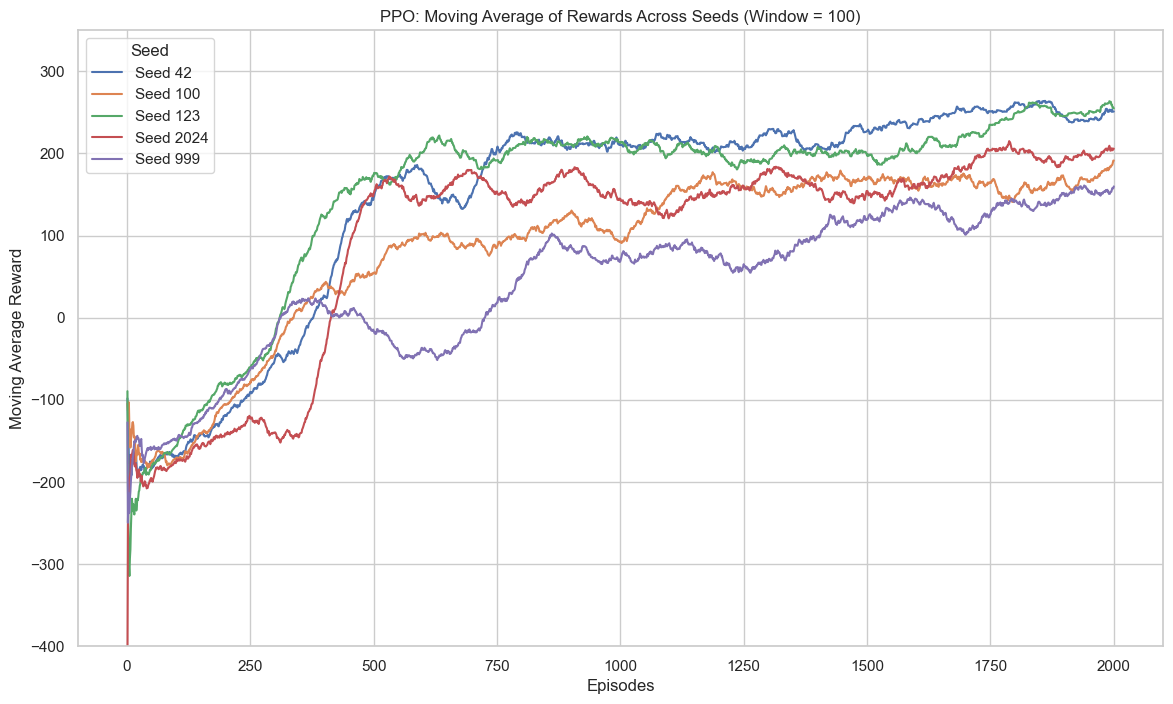

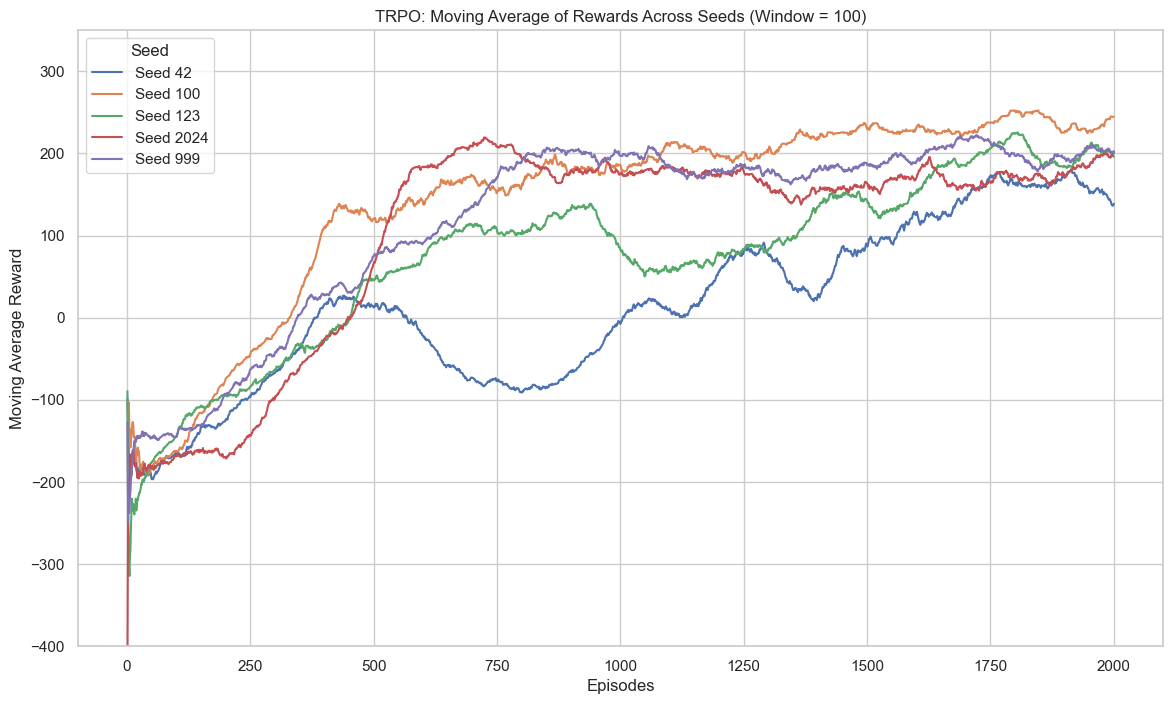

In [8]:
window_size = 100
# Compute moving averages
results_with_moving_avg = compute_moving_average(filtered_df, window_size)

# Plot moving averages with fixed y-axis
plot_moving_average_across_seeds(results_with_moving_avg, window_size)